In [1]:
# load your environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn import preprocessing

print("Good to go")

Good to go


In [2]:
# create a url path and call the data

url = './datasets/medical_examination.csv'
med = pd.read_csv(url)
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
med.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
med.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# convert the height column to meters

Height = med.height * 0.01


# convert the age column to years

year = med.age // 365


# pass in both the Height and year columns as new columns in the dataset

med['Height']=Height
med['year']=year
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height,year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,61


# NOTE:
- To get the BMI (Body Mass Index), the weight column must be divided by the square of the height column.
- Then pass in the result(BMI) as a column into the dataset

In [6]:
med.Height**2

BMI = med.weight // med.Height**2

med['BMI']=BMI
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height,year,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,50,21.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,55,34.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,51,23.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,48,28.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,47,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,52,26.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,61,50.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,52,31.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,61,27.0


In [7]:
# use the BMI to determine indiviuals that are overweight

overweight = (med.BMI > 25).astype(int)

In [8]:
overweight

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: BMI, Length: 70000, dtype: int32

In [9]:
# after determining those that are overweight, pass in 'overweight' as column in the dataset

med['overweight']=overweight
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height,year,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,50,21.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,55,34.0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,51,23.0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,48,28.0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,47,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,52,26.0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,61,50.0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,52,31.0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,61,27.0,1


In [10]:
med.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'Height',
       'year', 'BMI', 'overweight'],
      dtype='object')

In [11]:
# normalize the dataset by replacing 0 for 1 and 1 for values that are above 1 in the cholesterol and gluc columns

med.loc[med.cholesterol == 1, 'cholesterol'] = 0
med.loc[med.cholesterol > 1, 'cholesterol'] = 1
med.loc[med.gluc == 1, 'gluc'] = 0
med.loc[med.gluc > 1, 'gluc'] = 1

med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height,year,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,50,21.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,55,34.0,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,51,23.0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,48,28.0,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,47,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,52,26.0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,61,50.0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,52,31.0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,61,27.0,1


In [12]:
# convert the data into long format

med_cat = pd.melt(med, id_vars=['cardio'], value_vars=['active',  'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
med_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [13]:
med_cat['total']=1
med_cat

,cardio,variable,value,total
0,0,active,1,1
1,1,active,1,1
2,1,active,0,1
3,1,active,1,1
4,0,active,0,1
...,...,...,...,...
419995,0,smoke,1,1
419996,1,smoke,0,1
419997,1,smoke,0,1
419998,1,smoke,0,1


In [14]:
med_cat = med_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
med_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,19281
9,0,overweight,1,15740


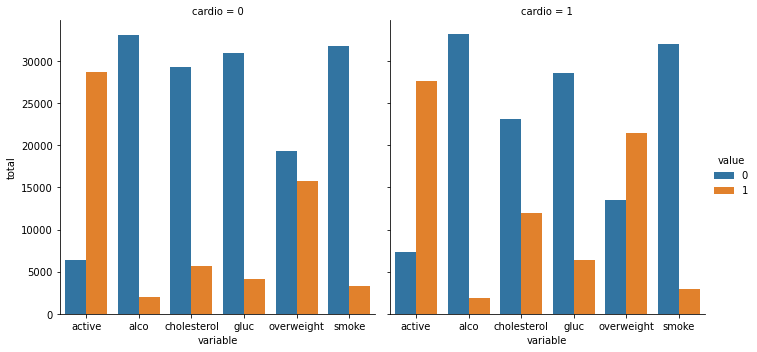

In [15]:
# create a chart that shows the value counts of the categorical features using seaborn's `catplot()`

sns.catplot(x='variable', y='total', col='cardio', hue='value', kind='bar', data=med_cat)

In [16]:
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height,year,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,50,21.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,55,34.0,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,51,23.0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,48,28.0,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,47,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,52,26.0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,61,50.0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,52,31.0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,61,27.0,1


In [17]:
# dropping of irrelevant columns (Height, year, and BMI)

med.drop(columns = ['Height', 'year', 'BMI'], axis=1, inplace=True)
med

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [18]:
# cleaning the data that represent incorrect patient information under 2.5th and above 97.5th percentile

med_clean = med[(med['ap_lo'] <= med['ap_hi']) &
                  (med['height'] >= med['height'].quantile(0.025)) &
                  (med['height'] < med['height'].quantile(0.975)) &
                  (med['weight'] >= med['weight'].quantile(0.025)) &
                  (med['weight'] < med['weight'].quantile(0.975))]
med_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [19]:
# creating multiple categorical plots to show the relationship between the Age column and other columns

# first we call the cleaned data set and then convert the data in the age column to years

In [20]:
med_clean["age"]=med_clean["age"]//365
med_clean

C:\Users\hp\AppData\Local\Temp/ipykernel_10108/308621134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_clean["age"]=med_clean["age"]//365


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,57,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,52,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,0,1,0,0,0,1,1


In [21]:
# creating multiple plots to show the relationship between the age and other columns

## Plot 1

### This plot shows the relationship between the age and weight columns and helps us to ascertain by means of visualization the weight of the various ages represented in the dataset

<AxesSubplot:xlabel='age', ylabel='weight'>

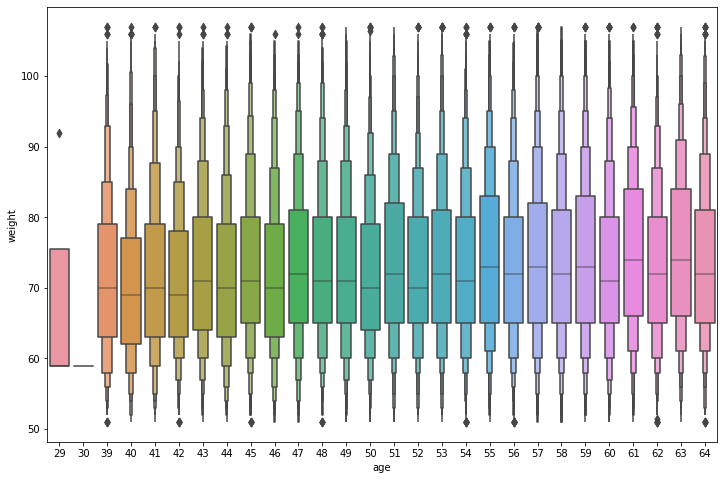

In [22]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='age', y='weight', data=med_clean)

## Plot 2

### This plot shows the relationship between the age and cardio columns and helps us to ascertain by means of visualization the various ages with presence (if it high) or absence(if its low) of cardiovascular disease in the dataset.

<AxesSubplot:xlabel='age', ylabel='cardio'>

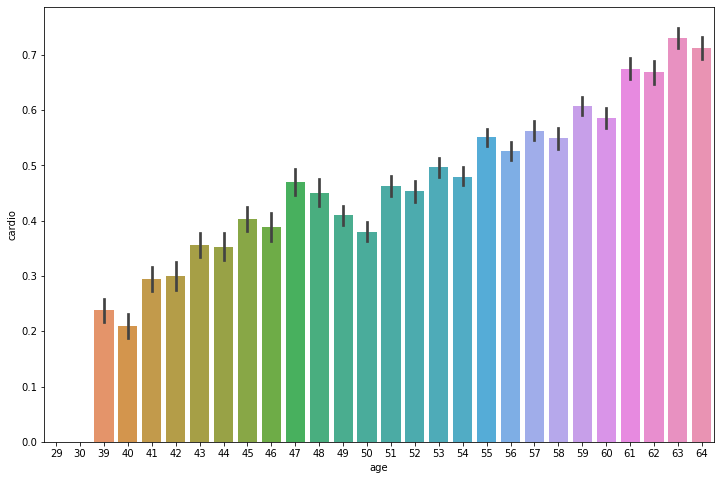

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='cardio', data=med_clean)

## Plot 3

### This plot shows the relationship between ap_lo (Diastolic blood pressure) and the age columns. It reveals to us the various ages with a likely chance of being elevated, experiencing a high blood pressure or hypertension once their ap_lo number is higher than 80 lower pressure than the normal in the dataset

<AxesSubplot:xlabel='age', ylabel='ap_lo'>

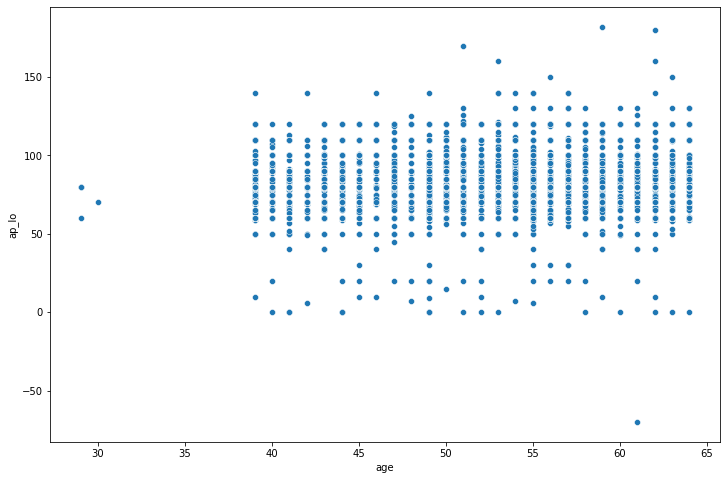

In [24]:
# plot 3

plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='ap_lo', data=med_clean)

In [25]:
# creating a correlation matrix for the dataset

corr = med_clean.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003208,0.003559,0.001012,0.000936,0.002896,0.001142,0.004159,0.002248,-0.001834,-0.000346,0.005777,0.003898,-0.000581
age,0.003208,1.000000,-0.016563,-0.076993,0.071417,0.021268,0.154398,0.130083,0.087450,-0.042283,-0.026764,-0.012295,0.240236,0.096024
gender,0.003559,-0.016563,1.000000,0.495375,0.121413,0.003478,0.059120,-0.037290,-0.021963,0.337618,0.166936,0.008771,0.003424,-0.072665
height,0.001012,-0.076993,0.495375,1.000000,0.240390,0.001840,0.014223,-0.064243,-0.032427,0.183578,0.084086,-0.003750,-0.023961,-0.177535
weight,0.000936,0.071417,0.121413,0.240390,1.000000,0.028190,0.226629,0.134989,0.104897,0.052085,0.056353,-0.013200,0.171317,0.697577
ap_hi,0.002896,0.021268,0.003478,0.001840,0.028190,1.000000,0.075537,0.024998,0.012344,-0.001696,0.001007,-0.000969,0.052045,0.020191
ap_lo,0.001142,0.154398,0.059120,0.014223,0.226629,0.075537,1.000000,0.149916,0.074448,0.023740,0.032205,0.002666,0.327413,0.183422
cholesterol,0.004159,0.130083,-0.037290,-0.064243,0.134989,0.024998,0.149916,1.000000,0.383649,0.012563,0.037591,0.002712,0.203942,0.140102
gluc,0.002248,0.087450,-0.021963,-0.032427,0.104897,0.012344,0.074448,0.383649,1.000000,-0.005268,0.013238,-0.010042,0.089089,0.098915
smoke,-0.001834,-0.042283,0.337618,0.183578,0.052085,-0.001696,0.023740,0.012563,-0.005268,1.000000,0.338451,0.026288,-0.020403,-0.011247


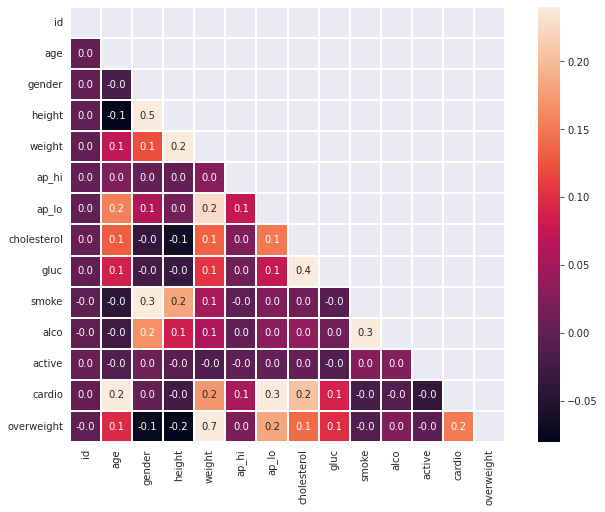

In [26]:
# plotting the correlation matrix using seaborn's heatmap

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    fig = plt.subplots(figsize = (12,8))
    fig = sns.heatmap(corr, vmin = -0.08, vmax = .24, square = True, annot = True, linewidths = .08, fmt = ".1f", mask=mask)